## Final Proposal: The LEGO Database

#### Principal Investigator: [John Martinez](https://github.com/JohnMartinez12/my_first_repository) <br> Email: [john.martinez@nyu.edu](john.martinez@nyu.edu)

This project will study the evolution of [LEGO](https://en.wikipedia.org/wiki/Lego) over time. [This](https://www.kaggle.com/rtatman/lego-database/data) dataset contains multiple csvs containing information on every official LEGO set ever released. With it, I would like to answer questions such as:
- Has the size of LEGO sets (brick count) increased over time?
- How has the complexity (distinct brick count) of LEGO sets changed?
- What themes have gotten the most/least sets over time? What themes have been sold for the longest and/or died?
- Which pieces are associated with which colors and themes? How have color distrubutions evolved? 





In [26]:
import pandas as pd
# To read the schema and plot data 
import matplotlib.pyplot as plt 
import imageio
%matplotlib inline 

In [3]:
cd lego-database/ # Let us go into the folder with our data 

/Users/johnmartinez/Desktop/Spring 2018/Data_Bootcamp/final/lego-database


In [4]:
ls # and see what there is to read 

colors.csv*           inventory_parts.csv*  parts.csv*
downloads_schema.png* inventory_sets.csv*   sets.csv*
inventories.csv*      part_categories.csv*  themes.csv*


In [53]:
colors = pd.read_csv("colors.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")
parts = pd.read_csv("parts.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
sets = pd.read_csv("sets.csv")
inventories = pd.read_csv("inventories.csv")
part_categories = pd.read_csv("part_categories.csv")
themes = pd.read_csv("themes.csv")

### Data Overview

Here we see the DataFrames including the details of LEGO sets over the past several decades, including the release year, the set ids, part ids and colors. 

In [6]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [7]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [8]:
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [10]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [15]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [17]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [19]:
part_categories.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [20]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [29]:
img = imageio.imread("downloads_schema.png")

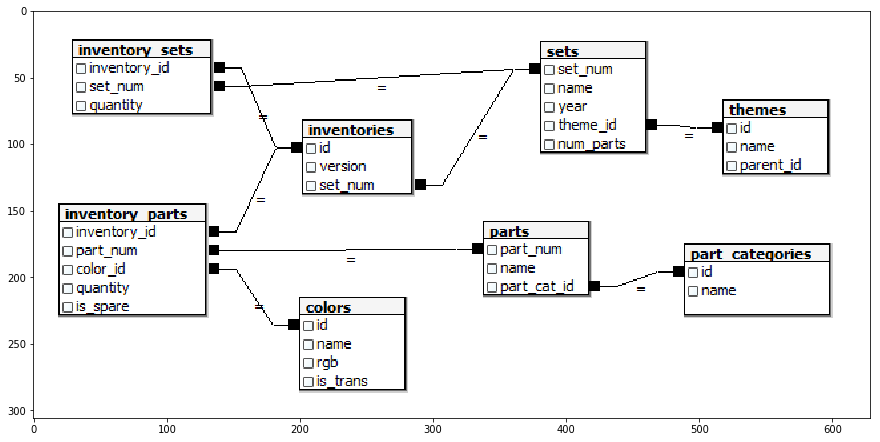

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(img)

Here we see the scehema, showing how the csvs are related.

### Important Variables 
The following variables will be essential to answering the questions:

All aforementioned question examples are over time, so we will need the release year.

In [42]:
sets["year"].head()

0    1970
1    1978
2    1987
3    1979
4    1979
Name: year, dtype: int64

Since we want to examine set size, we will require part count 

In [43]:
sets.num_parts.head() 

0    471
1     12
2      2
3     12
4     12
Name: num_parts, dtype: int64

We want the set_num to relate DataFrames to each other using the schema. Can we get a list of the of parts for each set?

In [84]:
# Here let's look at the some of the sets that part 3008 appeared in. 
part_to_set = inventory_parts.join(inventories.set_index("id"), on = "inventory_id").sort_values(by='set_num')
part_to_set[part_to_set.part_num == '3008'].head(10)

,inventory_id,part_num,color_id,quantity,is_spare,version,set_num
187761,5574,3008,4,2,f,1,00-1
187762,5574,3008,14,14,f,1,00-1
187760,5574,3008,15,2,f,1,00-1
469360,13813,3008,0,4,f,1,00-2
469361,13813,3008,15,3,f,1,00-2
29465,898,3008,0,2,f,1,00-3
29464,898,3008,4,14,f,1,00-3
227288,6772,3008,15,2,f,1,044-1
227287,6772,3008,4,2,f,1,044-1
99168,2962,3008,15,3,f,1,055-2


It seems set 00-1 had 26 distinct parts. 

In [81]:
parts = pd.unique(part_to_set[part_to_set.set_num == '00-1'].part_num)
parts

array(['3021', '3008', '3009', '3010', '777px8', '700ed', '3081cc01',
       '3062a', '3045', '3043', '3039', '3038', '3036', '3035', '3032',
       '3028', '3022', '3020', '3007', '3006', '29c01', '3001a', '3002a',
       '3003', '3004', '3005'], dtype=object)

In [82]:
parts.size

26

### Summary 
It appears that this dataset can indeed answer the questions. 